In [1]:
import numpy as np
from numpy import trapz
import pandas as pd

from os import listdir

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.style as style
style.use('seaborn-whitegrid')
font = {'size' : 12}
figure = {'titlesize' : 18}
plt.rc('font', **font)
plt.rc('figure', **figure)

import seaborn as sns
sns.set(font_scale=1.2)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from tqdm import tqdm
from tabulate import tabulate

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

---

# Import

In [2]:
path = '../../dataset/'
df = pd.read_csv(path + 'eda_export.csv')
df_import = df.copy()

---

# Overview

In [3]:
df.shape

(499874, 34)

In [4]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'publishedAt_y',
       'publishedAt_m', 'publishedAt_d', 'publishedAt_h', 'trending_date_y',
       'trending_date_m', 'trending_date_d', 'publishedAt_w',
       'trending_date_w', 'tags_n', 'title_len', 'title_upper', 'title_lower',
       'title_case_ratio', 'des_len', 'punc_count', 'likes_dis_ratio'],
      dtype='object')

In [5]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d,publishedAt_w,trending_date_w,tags_n,title_len,title_upper,title_lower,title_case_ratio,des_len,punc_count,likes_dis_ratio
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12 00:00:00,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020,8,11,22,2020,8,12,Tuesday,Wednesday,14,46,37,0,NaN,926.00,1,174.73
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,8,11,15,2020,8,12,Tuesday,Wednesday,47,25,14,4,3.50,301.00,0,47.07
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12 00:00:00,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020,8,10,14,2020,8,12,Monday,Wednesday,7,29,11,11,1.00,334.00,0,7.25
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11 15:00:09,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12 00:00:00,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,2020,8,11,15,2020,8,12,Tuesday,Wednesday,42,48,6,33,0.18,550.00,0,191.00
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11 20:04:02,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12 00:00:00,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,2020,8,11,20,2020,8,12,Tuesday,Wednesday,22,52,5,29,0.17,1167.00,0,5.55


In [6]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d,tags_n,title_len,title_upper,title_lower,title_case_ratio,des_len,punc_count,likes_dis_ratio
count,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,413762.00,493768.00,499874.00,496060.00
mean,19.16,1977152.47,118476.23,2994.52,12231.54,2020.50,6.50,15.68,13.11,2020.51,6.44,15.64,17.27,53.98,12.90,24.44,0.86,936.09,0.38,79.24
std,6.76,5996266.65,414437.02,52657.96,110248.79,0.50,3.87,8.65,6.42,0.50,3.86,8.62,13.45,22.50,12.82,18.40,2.95,862.00,0.83,88.93
min,1.00,0.00,0.00,0.00,0.00,2020.00,1.00,1.00,0.00,2020.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01
25%,17.00,252727.50,9571.25,191.00,694.00,2020.00,3.00,8.00,9.00,2020.00,3.00,8.00,7.00,37.00,5.00,9.00,0.18,358.00,0.00,29.07
50%,22.00,637740.50,28969.00,536.00,2003.00,2020.00,8.00,16.00,14.00,2021.00,5.00,16.00,16.00,51.00,9.00,24.00,0.26,654.00,0.00,54.63
75%,24.00,1626219.25,89087.00,1676.00,6002.00,2021.00,10.00,23.00,18.00,2021.00,10.00,23.00,25.00,69.00,16.00,37.00,0.54,1229.00,0.00,98.16
max,29.00,264407389.00,16254784.00,12341474.00,6738572.00,2021.00,12.00,31.00,23.00,2021.00,12.00,31.00,135.00,100.00,85.00,84.00,83.00,4998.00,18.00,2120.61


---

# Normalizing Data

In [7]:
def min_max_scale(df: pd.DataFrame) -> pd.DataFrame:
    """
    Description: 
        - Apply min-max scaling to dataframe columns of type float
    Inputs: 
        - df, input dataframe to be normalized
    Returns:
        - df, normalized dataframe
    """
    
    numbered_columns = df.select_dtypes(include=[np.number, bool]).columns     # extract columns that are of type float
    scaler = preprocessing.MinMaxScaler()
    df[numbered_columns] = scaler.fit_transform(df[numbered_columns])     # normalize across columns 
    return df.copy()

---

# Splitting Data

In [8]:
def split_data(df: pd.DataFrame, replace_nan: int) -> list:
    """
    Description: 
        - split data into training and testing datasets
    Inputs: 
        - df, input dataframe to be split
        - replace_nan, value to replace nan values found in input dataframe
    Returns:
        - split_list, list containing train-test split of input dataframe
    """
    
    df = df.replace(np.nan, replace_nan).copy()     # replace nan values
    
    X = df.drop(columns=df.columns[-1]).copy()     # remove categorical data
    y = df[df.columns[-1]].copy()
    
    split_list = train_test_split(X, y, random_state=40, test_size=0.3)
    
    print('=== Train shape ===')
    print(split_list[0].shape)
    print()
    
    print('=== Test shape ===')
    print(split_list[1].shape)
    print()
    
    return split_list

---

# Random forest

## Building dataset

In [9]:
df = df_import.copy()

### Ranging view_count

In [10]:
df['view_count'].describe()

count      499874.00
mean      1977152.47
std       5996266.65
min             0.00
25%        252727.50
50%        637740.50
75%       1626219.25
max     264407389.00
Name: view_count, dtype: float64

In [11]:
# transform view_count to specified dictionary ranking

d_view_ranks = {
    'H':0,
    'G':100000,
    'F':250000, 
    'E':500000, 
    'D':1000000, 
    'C':2500000,
    'B':5000000, 
    'A':10000000,
}

for key, value in d_view_ranks.items():
    df.loc[df['view_count'] >= value, 'view_count_cat'] = key

In [12]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'publishedAt_y',
       'publishedAt_m', 'publishedAt_d', 'publishedAt_h', 'trending_date_y',
       'trending_date_m', 'trending_date_d', 'publishedAt_w',
       'trending_date_w', 'tags_n', 'title_len', 'title_upper', 'title_lower',
       'title_case_ratio', 'des_len', 'punc_count', 'likes_dis_ratio',
       'view_count_cat'],
      dtype='object')

In [13]:
df.dtypes

video_id              object
title                 object
publishedAt           object
channelId             object
channelTitle          object
categoryId             int64
trending_date         object
tags                  object
view_count             int64
likes                  int64
dislikes               int64
comment_count          int64
thumbnail_link        object
comments_disabled       bool
ratings_disabled        bool
description           object
country               object
publishedAt_y          int64
publishedAt_m          int64
publishedAt_d          int64
publishedAt_h          int64
trending_date_y        int64
trending_date_m        int64
trending_date_d        int64
publishedAt_w         object
trending_date_w       object
tags_n                 int64
title_len              int64
title_upper            int64
title_lower            int64
title_case_ratio     float64
des_len              float64
punc_count             int64
likes_dis_ratio      float64
view_count_cat

In [14]:
# change column dtype

for col in 'categoryId publishedAt_m publishedAt_d publishedAt_h publishedAt_w trending_date_w'.split():
    df[col] = df[col].astype(str)

In [15]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country', 'publishedAt_y',
       'publishedAt_m', 'publishedAt_d', 'publishedAt_h', 'trending_date_y',
       'trending_date_m', 'trending_date_d', 'publishedAt_w',
       'trending_date_w', 'tags_n', 'title_len', 'title_upper', 'title_lower',
       'title_case_ratio', 'des_len', 'punc_count', 'likes_dis_ratio',
       'view_count_cat'],
      dtype='object')

In [16]:
# use select features for modelling

# with categorical
# df = df['categoryId likes dislikes comment_count country publishedAt_m publishedAt_h publishedAt_w trending_date_w tags_n title_len title_upper title_lower title_case_ratio des_len punc_count view_count_cat'.split()].copy()

# only numerical
df = df['likes dislikes likes_dis_ratio comment_count tags_n title_len title_upper title_lower title_case_ratio des_len punc_count view_count_cat'.split()].copy()

In [17]:
df.dtypes

likes                 int64
dislikes              int64
likes_dis_ratio     float64
comment_count         int64
tags_n                int64
title_len             int64
title_upper           int64
title_lower           int64
title_case_ratio    float64
des_len             float64
punc_count            int64
view_count_cat       object
dtype: object

In [18]:
vc = df['view_count_cat'].value_counts().sort_index()
vc

A     17011
B     21500
C     43681
D    103746
E     99101
F     91161
G     79625
H     44049
Name: view_count_cat, dtype: int64

In [19]:
# print out ranks, rank view count minumum, and count of videos per rank

# source: https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key

import collections

d_view_ranks = dict(collections.OrderedDict(sorted(d_view_ranks.items())))     # order the dictionary by key
d_view_ranks_keys = list(d_view_ranks.keys())
d_view_ranks_values = list(d_view_ranks.values())
vc_keys = list(vc.keys())
vc_values = list(vc.values)
data = {}


# create dictionary of 
for i in range(len(d_view_ranks)):
    assert d_view_ranks_keys[i] == vc_keys[i]
    data[d_view_ranks_keys[i]] = [d_view_ranks_values[i], vc_values[i]]

# print dictionary in table format
data = [(k, v[0], v[1]) for k, v in data.items()]
print(tabulate(data, headers=['ranks', 'view count minimum', 'count of videos']))

ranks      view count minimum    count of videos
-------  --------------------  -----------------
A                    10000000              17011
B                     5000000              21500
C                     2500000              43681
D                     1000000             103746
E                      500000              99101
F                      250000              91161
G                      100000              79625
H                           0              44049


### Normalizing

In [20]:
df_norm = min_max_scale(df.copy())
df_norm.head()

,likes,dislikes,likes_dis_ratio,comment_count,tags_n,title_len,title_upper,title_lower,title_case_ratio,des_len,punc_count,view_count_cat
0,0.01,0.00,0.08,0.00,0.10,0.45,0.44,0.00,NaN,0.19,0.06,F
1,0.04,0.00,0.02,0.00,0.35,0.24,0.16,0.05,0.04,0.06,0.00,B
2,0.00,0.00,0.00,0.00,0.05,0.28,0.13,0.13,0.01,0.07,0.00,D
3,0.00,0.00,0.09,0.00,0.31,0.47,0.07,0.39,0.00,0.11,0.00,F
4,0.00,0.00,0.00,0.00,0.16,0.52,0.06,0.35,0.00,0.23,0.00,F


## Running model

In [21]:
def random_forest_fit(df, model_arguments):
    
    
    # replacing nan value with -1
    X_train, X_test, y_train, y_test = split_data(df, -1)
    
    
    # create logistic regression model

    model = RandomForestClassifier(
        n_estimators=model_arguments['n_estimators'],
        criterion=model_arguments['criterion'],
        max_depth=model_arguments['max_depth'],
        min_samples_split=model_arguments['min_samples_split'],
        min_samples_leaf=model_arguments['min_samples_leaf'],
        min_weight_fraction_leaf=model_arguments['min_weight_fraction_leaf'],
        max_features=model_arguments['max_features'],
        max_leaf_nodes=model_arguments['max_leaf_nodes'],
        min_impurity_decrease=model_arguments['min_impurity_decrease'],
        min_impurity_split=model_arguments['min_impurity_split'],
        bootstrap=model_arguments['bootstrap'],
        oob_score=model_arguments['oob_score'],
        n_jobs=model_arguments['n_jobs'],
        random_state=model_arguments['random_state'],
        verbose=model_arguments['verbose'],
        warm_start=model_arguments['warm_start'],
        class_weight=model_arguments['class_weight'],
        ccp_alpha=model_arguments['ccp_alpha'],
        max_samples=model_arguments['max_samples'],
    )
    
    
    # fit data to model
    model.fit(X_train, y_train);
    
    
    return model, X_train, X_test, y_train, y_test

In [22]:
random_forest_default_arguments = {
    'n_estimators':100,
    'criterion':'gini',
    'max_depth':None,
    'min_samples_split':2,
    'min_samples_leaf':1,
    'min_weight_fraction_leaf':0.0,
    'max_features':'auto',
    'max_leaf_nodes':None,
    'min_impurity_decrease':0.0,
    'min_impurity_split':None,
    'bootstrap':True,
    'oob_score':False,
    'n_jobs':None,
    'random_state':None,
    'verbose':0,
    'warm_start':False,
    'class_weight':None,
    'ccp_alpha':0.0,
    'max_samples':None,
}

model, X_train, X_test, y_train, y_test = random_forest_fit(df_norm, random_forest_default_arguments)

=== Train shape ===
(349911, 11)

=== Test shape ===
(149963, 11)



## Performance

In [23]:
def model_f1(model, X_train, X_test, y_train, y_test):
    
    
    # predict classes using mode
    
    y_pred = model.predict(X_train)
    f1_train = round(f1_score(y_train, y_pred, zero_division=0, average='weighted'), 3)

    y_pred = model.predict(X_test)
    f1_test = round(f1_score(y_test, y_pred, zero_division=0, average='weighted'), 3)

    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])
    f1_cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1)
    f1_cv_mean = round(f1_cv_scores.mean(), 3)
    
    
    # print scores
    
    print('=== Training f1-score ===')
    print(f1_train)
    print()

    print('=== Testing f1-score ===')
    print(f1_test)
    print()

    print('=== Cross-validating dataset f1-score ===')
    print(f1_cv_mean)
    
    return y_pred, f1_train, f1_test, X, y, f1_cv_scores, f1_cv_mean

In [24]:
# get f1-scores

y_pred, f1_train, f1_test, X, y, f1_cv_scores, f1_cv_mean = model_f1(model, X_train, X_test, y_train, y_test)

=== Training f1-score ===
1.0

=== Testing f1-score ===
0.87

=== Cross-validating dataset f1-score ===
0.879


In [25]:
# classification report

report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           A       0.98      0.97      0.97      5092
           B       0.94      0.93      0.94      6505
           C       0.93      0.92      0.92     13058
           D       0.90      0.93      0.91     31112
           E       0.85      0.86      0.86     29925
           F       0.83      0.82      0.82     27324
           G       0.82      0.82      0.82     23743
           H       0.89      0.82      0.86     13204

    accuracy                           0.87    149963
   macro avg       0.89      0.88      0.89    149963
weighted avg       0.87      0.87      0.87    149963



In [26]:
pd.Series(y_test).value_counts()

D    31112
E    29925
F    27324
G    23743
H    13204
C    13058
B     6505
A     5092
Name: view_count_cat, dtype: int64

In [27]:
def confusion_matricies(y_test, y_pred):
    
    
    # create matrix
    
    labels = np.sort(pd.Series(y_test).unique())
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    # source: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    df_cm = pd.DataFrame(cm, index = [i for i in labels], columns = [i for i in labels])
    
    
    # plot absolute values
    
    plt.figure(figsize = (10,5))
    sns.heatmap(df_cm, annot=True, fmt='.0f', cmap="Blues")
    plt.tight_layout()
    plt.show();
    print()
    
    
    # plot normalized values
    
    plt.figure(figsize = (10,5))
    sns.heatmap(df_cm.apply(lambda r: r/r.sum(), axis=1), annot=True, fmt='.2f', cmap="Blues")
    plt.tight_layout()
    plt.show();

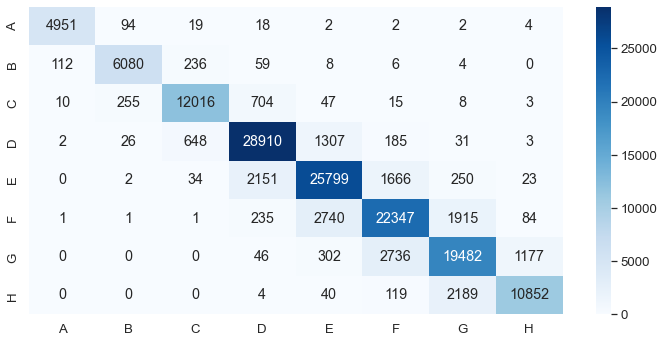

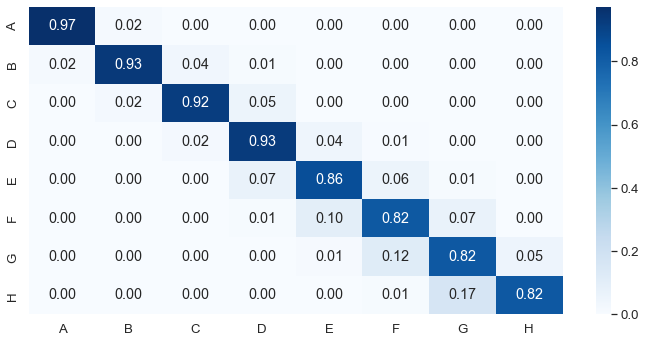

In [28]:
confusion_matricies(y_test, y_pred)

## Feature importance

In [29]:
# find feature importance

importance = pd.DataFrame(data=X_train.columns, columns=['features'])
importance['importance_score'] = model.feature_importances_
importance

,features,importance_score
0,likes,0.20
1,dislikes,0.14
2,likes_dis_ratio,0.11
3,comment_count,0.14
4,tags_n,0.07
5,title_len,0.07
6,title_upper,0.06
7,title_lower,0.06
8,title_case_ratio,0.06
9,des_len,0.08


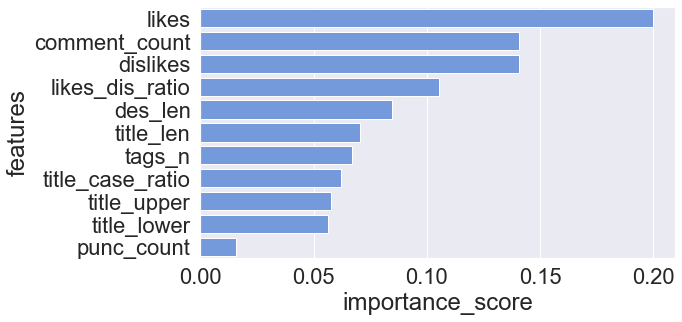

In [30]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(10, 5))
bp = sns.barplot(data=importance.sort_values('importance_score', ascending=False), x='importance_score', y='features', color='cornflowerblue');
plt.tight_layout()

---